<h1> Using Simple Linear Regression to Predict Housing Prices

<h3>Introduction</h3> 
This project builds a machine learning model using Simple Linear Regression to predict housing market sale prices in two neighbourhoods based on their list prices.

<h3> Importing Required Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Reading the Data

In [3]:
df = pd.read_csv("reale.csv")
df.head()

,Case_ID,sale price in $100000,list price in $100000,taxes,location
0,1,16.750,15.99000,6683.0,O
1,2,9.300,9.99999,6119.0,O
2,3,10.380,10.80000,6477.0,O
3,4,11.325,11.99000,6500.0,O
4,5,11.500,11.69000,6494.0,O


We want to see how many rows/columns are in the original dataset. From below, we see that there are 163 rows and 5 columns.

In [4]:
df.shape

(163, 5)

In [5]:
realdf = df.rename(columns={'sale price in $100000': 'sale_price', 'list price in $100000': 'list_price'})
realdf.head()

,Case_ID,sale_price,list_price,taxes,location
0,1,16.750,15.99000,6683.0,O
1,2,9.300,9.99999,6119.0,O
2,3,10.380,10.80000,6477.0,O
3,4,11.325,11.99000,6500.0,O
4,5,11.500,11.69000,6494.0,O


<h3> Data Exploration and Cleaning

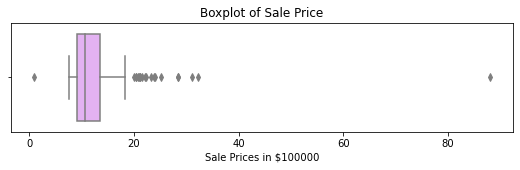

In [6]:
plt.figure(figsize =(9,2))
sns.boxplot(x='sale_price', color="#E9A7FD", data=realdf)
plt.title("Boxplot of Sale Price")
plt.xlabel("Sale Prices in $100000")
plt.show()

Here we can see that the minimum and maximum points are well out of the range of the rest of the other datapoints and thus it is reasonable to remove them from the dataset. We first find these minimum and maximum values.

In [7]:
#find the min & max prices
min_price=realdf['sale_price'].min()
max_price=realdf['sale_price'].max()
#drop the min & max prices
realdf.drop(realdf.loc[realdf['sale_price']==min_price].index, inplace=True)
realdf.drop(realdf.loc[realdf['sale_price']==max_price].index, inplace=True)
#make sure the 2 rows were removed.
realdf.shape

(161, 5)

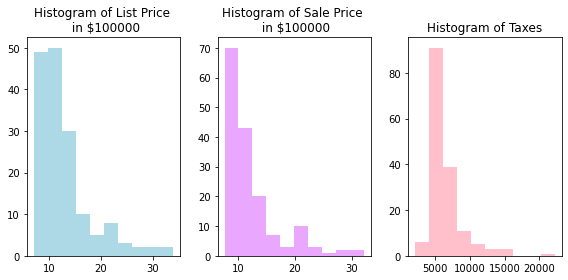

In [67]:
np.warnings.filterwarnings('ignore')
fig, axs = plt.subplots(1, 3, figsize = (8,4))
axs[0].hist(realdf['list_price'], color = "lightblue")
axs[0].set_title("Histogram of List Price \n in $100000")
axs[1].hist(realdf['sale_price'], color = "#E9A7FD")
axs[1].set_title("Histogram of Sale Price \n in $100000")
axs[2].hist(realdf['taxes'], color = "pink")
axs[2].set_title("Histogram of Taxes")
fig.tight_layout()

Now, we examine the variables 'list_price' and 'taxes' to see which is more reasonable to use as a predictor variable. We do this by drawing a scatterplot of the response variable, 'sale_price', against the two variables individually, and observing how linear the relationship is between them. 

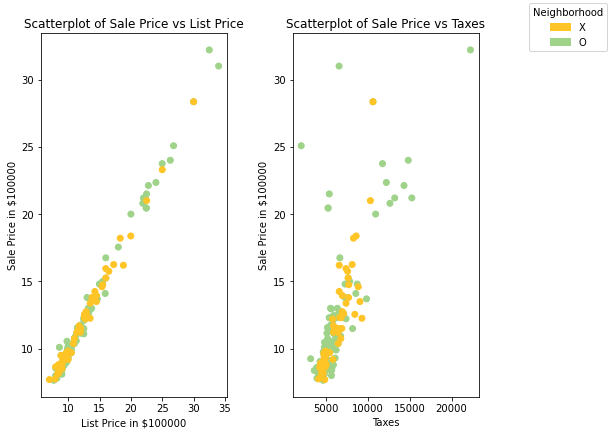

In [68]:
import matplotlib.patches as mpatches
fig, axs = plt.subplots(1,2, figsize = (7,6))

colors = {'X':'#FFC425', 'O':'#9FD38A'}

axs[0].scatter(realdf['list_price'], realdf['sale_price'], c=realdf['location'].apply(lambda x: colors[x]))
axs[0].set_title("Scatterplot of Sale Price vs List Price")
axs[0].set(xlabel="List Price in $100000", ylabel="Sale Price in $100000")

axs[1].scatter(realdf['taxes'], realdf['sale_price'], c=realdf['location'].apply(lambda x: colors[x]))
axs[1].set_title("Scatterplot of Sale Price vs Taxes")
axs[1].set(xlabel="Taxes", ylabel="Sale Price in $100000")

# build the legend
red_patch = mpatches.Patch(color='#FFC425', label='X')
blue_patch = mpatches.Patch(color='#9FD38A', label='O')
patches = [red_patch, blue_patch]
fig.legend(handles=patches,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = "Neighborhood")

#show plots
fig.tight_layout()

Both are generally linear so linear is a good model for both; however, sale price vs list price is more linear so we will use this one for our model since it will result in a more accurate model.

<h3> Creating Testing and Training Sets </h3>
We'll use 'train_test_split' from sklearn.model_selection

In [69]:
x_train, x_test, y_train, y_test = train_test_split(realdf[['list_price']], realdf[['sale_price']], test_size = 0.2, random_state = 0)

# put training and test data into single dataframe
training_set = pd.concat([x_train, y_train], axis=1)
test_set = pd.concat([x_test, y_test], axis=1)

#quickly glimpse the data
print(training_set[0:6])
print(test_set[0:6])

     list_price  sale_price
80     14.65000    13.70000
19      9.88888     9.99888
74      9.80000     9.50000
133    16.48000    15.75000
16     17.99000    17.55000
60     13.29000    12.69500
     list_price  sale_price
112     8.24990        8.65
114     8.98000        8.90
145    13.80000       13.80
7       8.99900        8.50
44      9.99999        9.75
107    12.58888       12.55


<h3> Train Data to Make Predictions </h3>

In [70]:
lr = LinearRegression()

lr.fit(x_train, y_train) #train model with training data

print(lr.coef_)
print(lr.intercept_)

#use trained model to make predictions with test data
predictions = lr.predict(x_test)

diff = y_test - predictions

[[0.92033843]]
[0.58908141]


<h3> Model Evaluation </h3>

Text(0, 0.5, 'Y axis label')

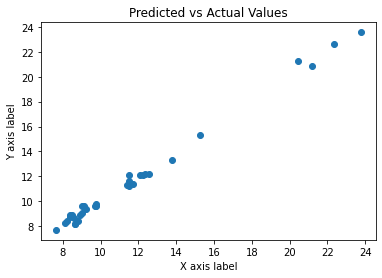

In [71]:
#visualize difference in true values (y_test) vs the predicted values using x_test
plt.scatter(y_test, predictions)
plt.title("Predicted vs Actual Values")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

Here, we see that the plotted points follow straight line. This shows that the model gives good prediction since there is little difference between predicted and true values.

In [72]:
from sklearn import metrics

#evaluate model based on metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
sqrt_mse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(mae,mse,sqrt_mse)

0.2678379903733646 0.11079168050396031 0.3328538425554981


The low Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error further reinfornce that this is a good model because there is little difference between the prediction and the actual value.

<h3> Improvements </h3>
While this predictive model seems very accurate with the low error values, it is built on a dataset with only 163 data points. Currently, the very low error rates could be due to the low sample size, and may change with more data points. To improve the quality of this model, and get a larger scope of the housing market and its sale prices, we can use a larger dataset.